In [11]:
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
df = pd.read_csv('./data/initial_cleaned_data.csv', index_col=0)

df['release_date'] = pd.to_datetime(df['release_date'])

df['log_popularity'] = np.log(df['popularity'] + 1)


# sns.histplot(data=df, x="")

# plt.boxplot(popularities)
# plt.show()

count                           107336
mean     1995-06-07 18:53:16.452262144
min                1887-01-01 00:00:00
25%                1986-01-01 00:00:00
50%                2007-02-06 00:00:00
75%                2014-12-10 00:00:00
max                2023-03-10 00:00:00
Name: release_date, dtype: object


<AxesSubplot:xlabel='release_date', ylabel='Count'>

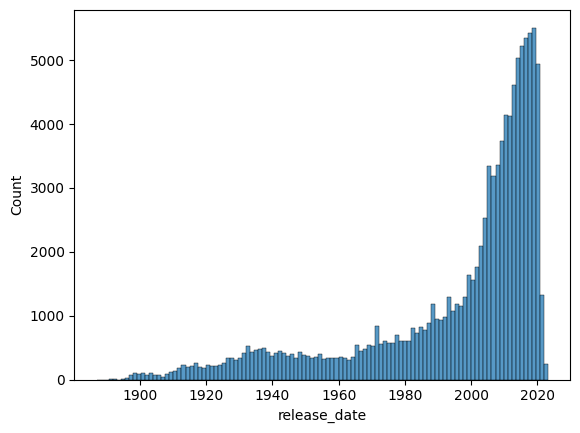

In [16]:
print(df['release_date'].describe(datetime_is_numeric=True))
# Show the release dates of movies
sns.histplot(data=df, x="release_date")

<AxesSubplot:xlabel='release_date', ylabel='log_popularity'>

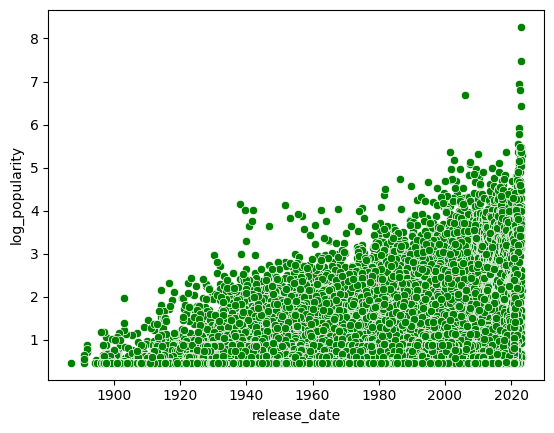

In [33]:
sns.scatterplot(data=df, x='release_date', y='log_popularity', color='green')

,budget,genres,id,imdb_id,original_title,overview,popularity,poster_path,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,log_popularity
76600,460000000,"['Science Fiction', 'Adventure', 'Action']",76600,tt1630029,Avatar: The Way of Water,Set more than a decade after the events of the...,1751.144,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,2022-12-14,2116000000,192,['English'],Return to Pandora.,Avatar: The Way of Water,7.745,4935,7.468595
168626,500000000,"['Comedy', 'Drama', 'Thriller']",168626,tt2211240,DeAD,Patrick feels absolutely lonely when he decide...,0.600,NaN,2013-02-10,201103001,104,['German'],NaN,DeAD,0.000,0,0.470004
299536,300000000,"['Adventure', 'Action', 'Science Fiction']",299536,tt4154756,Avengers: Infinity War,As the Avengers and their allies have continue...,212.628,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,2018-04-25,2046239637,149,"['English', 'Xhosa']",An entire universe. Once and for all.,Avengers: Infinity War,8.265,26225,5.364236
757658,800000000,"['Drama', 'Thriller']",757658,NaN,Ex-Wife,A man named Bobby Nash (Billy Mcfly) moves to ...,0.600,NaN,NaT,0,63,[],You Think You Know Your Partner?,Ex-Wife,0.000,0,0.470004


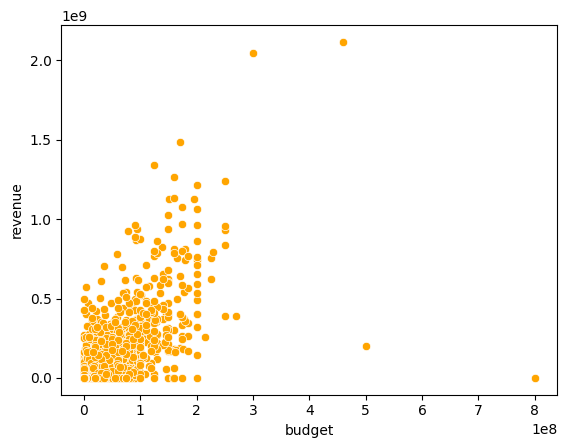

In [26]:
sns.scatterplot(data=df, x='budget', y='revenue', color='orange')

<AxesSubplot:xlabel='runtime', ylabel='Count'>

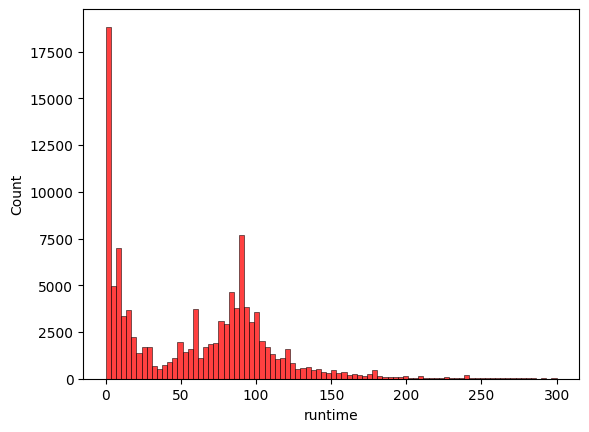

In [35]:
df['runtime'].describe()
df[df['runtime'] > 1000]
sns.histplot(data=df, x="runtime", binrange=[0, 300], color='red')

<AxesSubplot:xlabel='title_length', ylabel='Count'>

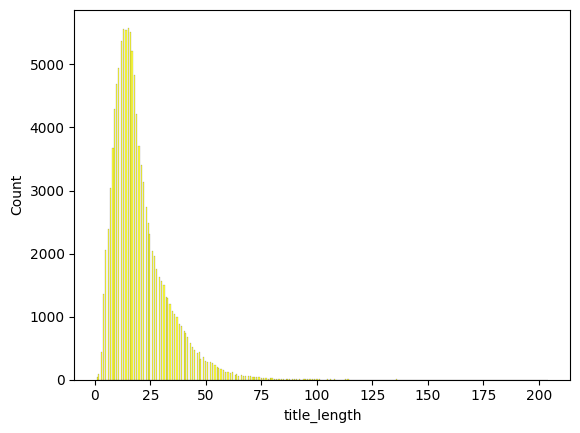

In [40]:
df['title'] = df['title'].astype(str)
df['title_length'] = df['title'].apply(len)
sns.histplot(data=df, x="title_length", color='yellow')

<AxesSubplot:xlabel='num_languages', ylabel='Count'>

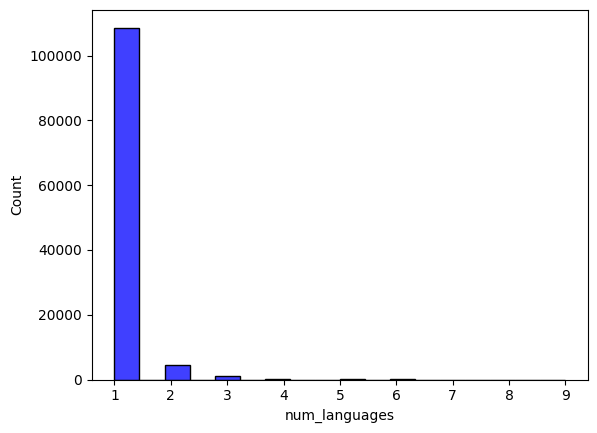

In [44]:
df['genres'] = df.apply(lambda row: row['genres'].strip('[]').replace("'", '').replace(' ', '').split(','), axis=1)
df['spoken_languages'] = df.apply(lambda row: row['spoken_languages'].strip('[]').replace("'", '').replace(' ', '').split(','), axis=1)
df['num_languages'] = df['spoken_languages'].apply(len)
sns.histplot(data=df, x="num_languages", color='blue')

<AxesSubplot:xlabel='num_genres', ylabel='Count'>

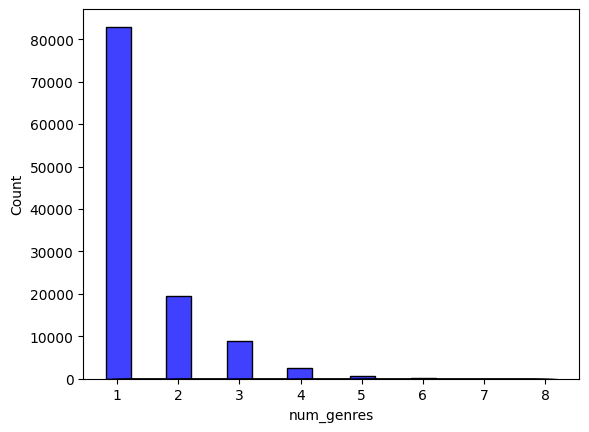

In [49]:
df['num_genres'] = df['genres'].apply(len)
sns.histplot(data=df, x="num_genres", color='blue', shrink=10.0)

<AxesSubplot:xlabel='num_genres', ylabel='log_popularity'>

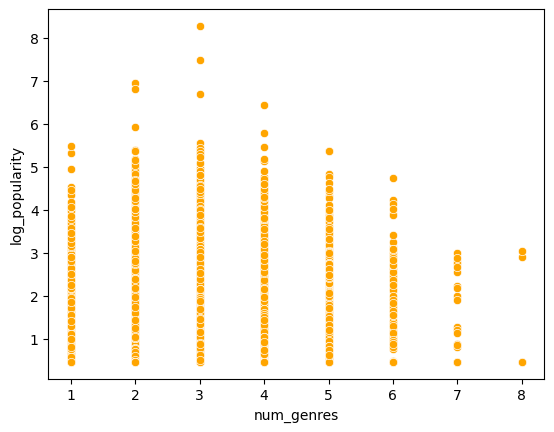

In [50]:
sns.scatterplot(data=df, x="num_genres", y='log_popularity', color='orange')

<AxesSubplot:xlabel='num_languages', ylabel='log_popularity'>

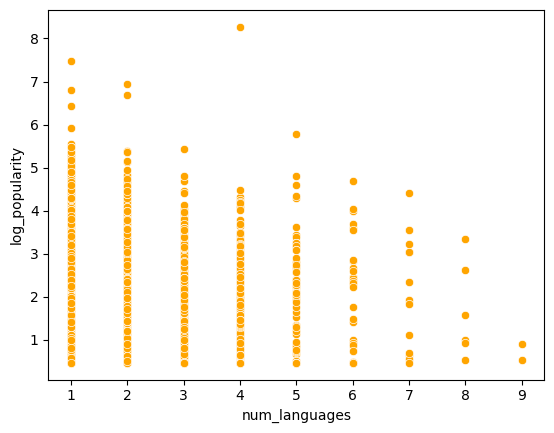

In [51]:
sns.scatterplot(data=df, x="num_languages", y='log_popularity', color='orange')

<AxesSubplot:xlabel='title_length', ylabel='log_popularity'>

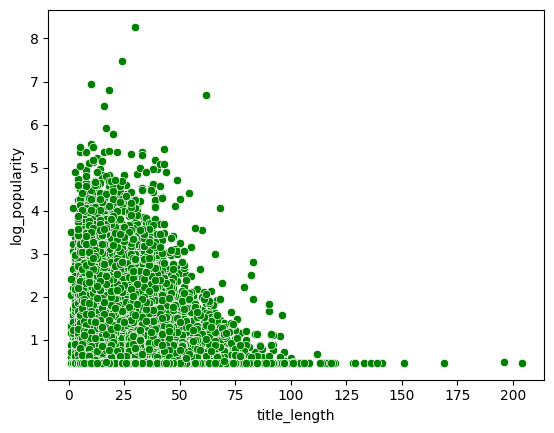

In [53]:
sns.scatterplot(data=df, x="title_length", y='log_popularity', color='green')